In [1]:
import pandas as pd
from itertools import zip_longest
from IPython.display import HTML as html_print
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import re

In [2]:
# read a file with subseq and values --- HEADER predictions sequence and class predicted
# 617==I==Spyke glycoprotein
# Fusion_Peptide ====SAIEDLLFDKVKLSDVGF
# Location peptide in fusion protein ==870-887
# predictions
# 	sequence	class predicted
# 0	SVSTGYRLTTFEPYTPML	0.359
# 1	VSTGYRLTTFEPYTPMLV	0.2768
# 2	STGYRLTTFEPYTPMLVN	0.3555
# 3	TGYRLTTFEPYTPMLVND	0.3426
# 4	GYRLTTFEPYTPMLVNDS	0.3618
# 5	YRLTTFEPYTPMLVNDSV	0.4343
# 6	RLTTFEPYTPMLVNDSVQ	0.3498
# 7	LTTFEPYTPMLVNDSVQS	0.3742
# 8	TTFEPYTPMLVNDSVQSV	0.2586
# 9	TFEPYTPMLVNDSVQSVD	0.3987
# 10	FEPYTPMLVNDSVQSVDG	0.1906
# 11	EPYTPMLVNDSVQSVDGL	0.1847
# ....



# 617==I==Spyke glycoprotein
# Fusion_Peptide ====SAIEDLLFDKVKLSDVGF
# Location peptide in fusion protein ==870-887
# predictions
# 	sequence	class predicted
#     ========================================================Predictions on test sequences
# 265==I==Envelope glycoprotein gp160 (Env polyprotein) 
# Fusion_Peptide ====AAGLGALFLGFLGDSREHMGA
# Location peptide in fusion protein ==488-508
# predictions
# ========================================================Predictions on test sequences
# 158==II==Genome polyprotein
# Fusion_Peptide ====MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
# Location peptide in fusion protein ==265-296
# predictions
# ========================================================Predictions on test sequences
# 618==I==fusion glycoprotein F0
# Fusion_Peptide ====FLGLILGLGAAVTAGVALAKT
# Location peptide in fusion protein ==102-122
# predictions

# ========================================================Predictions on test sequences
# 667==II==Envelopment polyprotein
# Fusion_Peptide ====WGCGCFNVNPSCLFVHT
# Location peptide in fusion protein ==1066-1082
# predictions
# ========================================================Predictions on test sequences
# 153==II==Genome polyprotein
# Fusion_Peptide ====IVVSATFCSALYIGDVCGAIMIAAQATIISPQ
# Location peptide in fusion protein ==265-296
# predictions
# 	sequence	class predicted
    
# ========================================================Predictions on test sequences
# 602==II==Structural polyprotein
# Fusion_Peptide ====VYPFLWGGAYCFCDSENT
# Location peptide in fusion protein ==903-920
# predictions

# ========================================================Predictions on test sequences
# 192==I==Spike glycoprotein S
# Fusion_Peptide ====LAATSASLFPPWTAAAGVPFY
# Location peptide in fusion protein ==963-983
# predictions

# ========================================================Predictions on test sequences
# 316==I==Fusion glycoprotein F0
# Fusion_Peptide ====CCGFTLGVGGAWFQAY
# Location peptide in fusion protein ==277-292
# predictions

# =======================================================Predictions on test sequences
# 196==I==Spike glycoprotein
# Fusion_Peptide ====IGGIALGGLTSAVSIPFSLAI
# Location peptide in fusion protein ==753-773
# predictions



# header_617 = '617==I==Spyke glycoprotein \n Fusion_Peptide ====SAIEDLLFDKVKLSDVGF \n Location peptide in fusion protein ==870-887'
# Blosum 62 regression RFR 
file_seq = 'results/regression6638/blosum62/rfr/blosum62_rfrseqs_test.txt'


special_line_indexes = []
unique_line_index = 0
with open(file_seq) as file_seq:
    for i, line in enumerate(file_seq.readlines()): 
        if '617==I==Spyke glycoprotein' in line:
            #extract line index for lines that contain //
            special_line_indexes.append(i + 5)
        elif '265==I==Envelope glycoprotein gp160 (Env polyprotein)' in line:
            special_line_indexes.append(i + 5)

        elif '158==II==Genome polyprotein' in line:
            special_line_indexes.append(i + 5)
            
        elif '618==I==fusion glycoprotein F0' in line:
            special_line_indexes.append(i + 5)
        elif '667==II==Envelopment polyprotein' in line:
            special_line_indexes.append(i + 5)
        elif '153==II==Genome polyprotein' in line:
            special_line_indexes.append(i + 5)
        elif '602==II==Structural polyprotein' in line:
            special_line_indexes.append(i + 5)
        elif '192==I==Spike glycoprotein S' in line:
            special_line_indexes.append(i + 5)
        elif '316==I==Fusion glycoprotein F0' in line:
            special_line_indexes.append(i + 5)
        elif '196==I==Spike glycoprotein' in line:
            special_line_indexes.append(i + 5)
        else:
            pass
print(special_line_indexes)


FileNotFoundError: [Errno 2] No such file or directory: 'results/regression6638/blosum62/rfr/blosum62_rfrseqs_test.txt'

In [3]:

def get_df_seq_specific(index, file_seq):
    with open(file_seq) as f:
        i = int(index)
        lines = f.readlines()
        print(len(lines))  
        line = lines[i]
        index_list = []
        subseq_list= []
        score_list = []
        for ii in range (len(lines)):
            line_score = lines[i+ii]
            if  '========================================' in line_score:
                df = pd.DataFrame.from_records(zip_longest(index_list,subseq_list,score_list), 
                                       columns=['index', 'subseq', 'score'])
                return df
            else:
                if len(line_score.split()) == 3:
                    index, subseq, score = line_score.split()
                elif len(line_score.split()) == 4:
                    index, subseq, altered_val, score = line_score.split()
                else:
                    index, subseq, class_predicted, prob_negative, score = line_score.split()
                index_list.append(index)
                subseq_list.append(subseq)
                score_list.append(round(float(score),4))
    

In [4]:
   
# get html element
def cstr(s, bold, color='black'):
    if s == ' ':
        return "<text style=color:#000;padding-left:10px;background-color:{}> </text>".format(color, s)
    else:
        if bold == 'b':
            return "<text style=color:#000;background-color:{}> <b><u>{}</u></b> </text>".format(color, s)
#         if tmd == 't':
#             return "<text style=color:#000;background-color:{}> <b><u>{}</u></b> </text>".format(color, s)
        else:
            return "<text style=color:#000;background-color:{}>{} </text>".format(color, s)

    #             return "<text style=color:#000;padding-left:10px;background-color:{}> <{}> </text> </{}>".format(bold,color,s,bold)
#             return "<text style=color:#000;background-color:{}>{} <{}> </text> </{}>".format(color,s,bold,bold) 

# print html
def print_color(t, bold_letter):
#     for i in range(len(t)):
#         ti = t[i][0]
#         ci = t[i][1]
#         bi = bold_letter[i][1]
    display(html_print(''.join([cstr(t[i][0],bold_letter[i][1], color=t[i][1]) for i in range(len(t))])))
#     display(html_print(''.join([cstr(ti, color=ci, bi) for ti,ci in t])))
#     display(html_print(''.join([bold(ti, bi) for ti,bi in bold_letter])))

# get appropriate color for value
def get_clr(value):
    cmap = cm.get_cmap('YlOrRd')  
    rgba = cmap(value)
    # rgb2hex accepts rgb or rgba
    col = matplotlib.colors.rgb2hex(rgba)
    return col
    
#check if this is ok
def get_scores_seq(seq,new_df, mode='max'):
    subseq = new_df['subseq'][0]
    list_scores=[]

    #for each subseq
    for i in range(new_df.shape[0]):
        #this reindex is because some files have the indexes of subseqs not begining in 0 but in the end of the other subseq
        new_df = new_df.drop(columns=['index'])
        new_df['index'] = list(range(0, new_df.shape[0]))

        subseq = new_df['subseq'][i]
        posi = int(new_df['index'][i])
        posf = posi+len(subseq)
        score = round(float(new_df['score'][i]),4)

        # try put all the values in a list of the scores . each letter has a list of values of the scores in which that letter appear
        if i<len(subseq):
            val = new_df['score'][:i+1]
        else:
            val = new_df['score'][i-len(subseq):i+1]
        
        if mode == 'max':
            new_val = max(val) # np.mean
        elif mode == 'mean':
            new_val = np.mean(val) 
        list_scores.append(round(float(new_val),4))
    
    # the last values from seq that are not in subseq
    i=len(subseq)
    while i:
        val = new_df['score'][new_df.shape[0]-i:new_df.shape[0]]
        i-=1
        if mode == 'max':
            new_val = max(val) # np.mean
        elif mode == 'mean':
            new_val = np.mean(val) 
        list_scores.append(round(float(new_val),4))
            
#         #update scores of sequence if in that position are lower 
#         if new_score[posi] <= score : 
#             new_score[posi] = score
#             new_score[posi:posf] = [score]*len(subseq)
#             for x in range(len(subseq)):
#                 new_score[posi+x] = score
#             try:
#                 new_score[posf] = score
#             except:
#                 pass 
#         else:
#             pass
#     print(new_score)
    return list_scores

def graphic(new_score):
    plt.plot(new_score)
    plt.show()
    

def visualize(new_df, seq, location,mode):
    new_score = get_scores_seq(seq,new_df,mode)
    graphic(new_score)
    text_colours = []
    bold_letter = []
    for i in range(len(seq)):
        text = (seq[i], get_clr(new_score[i]))
        text_colours.append(text)
        if i in range(location[0], location[1]-1):
            bold_letter.append((seq[i],'b'))
        else:
            bold_letter.append((seq[i],np.nan))
    
    # location in bold or box around 
    print_color(text_colours, bold_letter)

def visualize_tmd(tmd_file):
    with open(tmd_file) as f:
        lines = f.readlines()[2:]
        score_list = []
        bold_letter = []
        text_colours = []
        for line in lines:
            i, aa, inside, membr, outside = line.split()
#             print(membr.type()) # string
            text = (aa, get_clr(float(membr)))
            text_colours.append(text)
            bold_letter.append('none')
            score_list.append(membr)
        
        print_color(text_colours, bold_letter)
        

In [5]:
def get_seq(name):
    if name == 'spyke_glycoprotein_1':
        # 6 '617==I==Spyke glycoprotein' 
        i = 6
        seq = 'SVSTGYRLTTFEPYTPMLVNDSVQSVDGLYEMQIPTNFTIGHHEEFIQTRSPKVTIDCAAFVCGDNTACRQQLVEYGSFCVNVNAILNEVNNLLDNMQLQVASALMQGVTISSRLPDGISGPIDDINFSPLLGCIGSTCAEDGNGPSAIRGRSAIEDLLFDKVKLSDVGFVEAYNNCTGGQEVRDLLCVQSFNGIKVLPPVLSESQISGYTTGATAAAMFPPWSAAAGVPFSLSVQYRINGLGVTMNVLSENQKMIASAFNNALGAIQDGFDATNSALGKIQSVVNANAEALNNLLNQLSNRFGAISASLQEILTRLEAVEAKAQIDRLINGRLTALNAYISKQLSDSTLIKVSAAQAIEKVNECVKSQTTRINFCGNGNHILSLVQNAPYGLYFIHFSYVPISFTTANVSPGLCISGDRGLAPKAGYFVQDDGEWKFTGSSYYYPEPITDKNSVIMSSCAVNYTKAPEVFLNTSIPNPPDFKEELDKWFKNQTSIAPDLSLDFEKLNVTLLDLTYEMNRIQDAIKKLNESYINLKEVGTYEMYVKWPWYVWLLIGLAGVAVCVLLFFICCCTGCGSCCFKKCGNCCDEYGGHQDSIVIHNISSHED'
        subseq = 'SAIEDLLFDKVKLSDVGF'
        # tem a localizacao no excel mal. 
        tmd_file = 'datasets/test_seq_tmd/tmd_test_seq_617_Spyke_glycoprotein_I_Corona_S2.txt'
        
    elif name == 'envelope_glycoprotein':
    
        # 602 '265==I==Envelope glycoprotein gp160 (Env polyprotein)'
        i = 602
        seq = 'AAGLGALFLGFLGDSREHMGAASITLTVQARQLLSGIVQQQNNLLRAIEAQQHLLQLTVWGIKQLQARVLAVERYLKDQQLLGIWGCSGKLICTTNVPWNSSWSNKSQEEIWNNMTWMEWEKEISNYSNIIYKLIEESQNQQEKNEQELLALDKWASLWNWFDISNWLWYIKIFIMIVGGLIGLRIVFAVLSIVNRVRKGYSPLSLQTLIPSPRGPDRPEGIEEGGGEQGKDRSVRLVTGFLALAWDDLRNLCLFSYRHLRDFILIAARIVDRGLRRGWEALKYLGNLTRYWSQELKNSAISLFNTTAIVVAEGTDRIIEVLQRAGRAVLNIPRRIRQGAERALL'
        subseq = 'AAGLGALFLGFLGDSREHMGA'
        tmd_file = 'datasets/test_seq_tmd/tmd_test_seq_265_Envelope_glycoprotein_gp160 (Env polyprotein) _I_binding_to_receptor_ gp41.txt'
    
    elif name == 'genome_polyprotein_1':
        # 933 '158==II==genome_polyprotein' 
        i = 933
        seq = 'LEYRNASGLYTVTNDCSNGSIVYEAGDVILHLPGCIPCVRLNNASKCWTPVSPTVAVSRPGAATASLRTHVDMMVGAATLCSALYVGDLCGALFLVGQGFSWRHRQHWTVQDCNCSIYPGHLTGHRMAWDMMMNWSPAMTLIVSQVLRLPQTMFDLVIGAHWGVMAGVAYYSMQGNWAKVFLVLCLFSGVDA'
        subseq = 'MVGAATLCSALYVGDLCGALFLVGQGFSWRHR'
        tmd_file = 'datasets/test_seq_tmd/tmd_test_seq_158_Genome_polyprotein_II_Envelope_glycoprotein_E1.txt'
    
    elif name == 'fusion_glycoprotein_f0':
        # 1100 '618==I==fusion glycoprotein F0'
        i = 1100
        seq = 'FLGLILGLGAAVTAGVALAKTVQLESEIALIRDAVRNTNEAVVSLTNGMSVLAKVVDDLKNFISKELLPKINRVSCDVHDITAVIRFQQLNKRLLEVSREFSSNAGLTHTVSSFMLTDRELTSIVGGMAVSAGQKEIMLSSKAIMRRNGLAILSSVNADTLVYVIQLPLFGVMDTDCWVIRSSIDCHNIADKYACLARADNGWYCHNAGSLSYFPSPTDCEIHNGYAFCDTLKSLTVPVTSRECNSNMYTTNYDCKISTSKTYVSTAVLTTMGCLVSCYGHNSCTVINNDKGIIRTLPDGCHYISNKGVDRVQVGNTVYYLSKEVGKSIVVRGEPLVLKYDPLSFPDDKFDVAIRDVEHSINQTRTFFKASDQLLDLSENRENKNLNKSYILTTLLFVVMLIIIMAVIGFILYKVLKMIRDNKLKSKSTPGLTVLS'
        subseq = 'FLGLILGLGAAVTAGVALAKT'
        tmd_file = 'datasets/test_seq_tmd/tmd_test_seq_618_fusion_glycoprotein_F0_I_binding_to_receptor_F1.txt'

    elif name == 'envelopment_polyprotein':
        # 1522 '667==II==Envelopment polyprotein'
        i = 1522
        seq = 'CSELIQASSRITTCSTEGVNTKCRLSGTALIRAGSVGAEACLMLKGVKEDQTKFLKIKTVSSELSCREGQSYWTGSISPKCLSSRRCHLVGECHVNRCLSWRDNETSAEFSFVGESTTMRENKCFEQCGGWGCGCFNVNPSCLFVHTYLQSVRKEALRVFNCIDWVHKLTLEITDFDGSVSTIDLGASSSRFTNWGSVSLSLDAEGISGSNSFSFIESPSKGYAIVDEPFSEIPRQGFLGEIRCNSESSVLSAHESCLRAPNLISYKPMIDQLECTTNLIDPFVVFERGSLPQTRNDKTFAASKGNRGVQAFSKGSVQADLTLMFDNFEVDFVGAAVSCDAAFLNLTGCYSCNAGARVCLSITSTGTGSLSAHNKDGSLHIVLPSENGTKDQCQILHFTVPEVEEEFMYSCDGDERPLLVKGTLIAIDPFDDRREAGGESTVVNPKSGSWNFFDWFSGLMSWFGGPLKLYSSFACMLHYQLGSFSSLYILEEQASLKCGLLPLRRPHRSVRVKVIC'
        subseq = 'WGCGCFNVNPSCLFVHT'
        tmd_file = 'datasets/test_seq_tmd/tmd_test_seq_667_Envelopment_polyprotein_II_low_pH_Glycoprotein_Gc.txt'
    
    elif name=='genome_polyprotein_2':
        # 2028 '153==II==Genome polyprotein'
        i = 2028
        seq = 'VEVKNTSQIYMATNDCSNNSITWQLEGAVLHVPGCVPCESTGNISRCWIPVTPNVAVRERGALTKGLRTHIDLIVVSATFCSALYIGDVCGAIMIAAQATIISPQHHTFVQDCNCSIYPGHVTGHRMAWDMMMNWSPATTMIMAYFMRVPEVVLDIITGAHWGVMFGLAYFSMQGAWAKVVVILLLTAGVDA'
        subseq = 'IVVSATFCSALYIGDVCGAIMIAAQATIISPQ'
        tmd_file = 'datasets/test_seq_tmd/tmd_test_seq_153_Genome_polyprotein_II_Envelope_glycoprotein_E1.txt'

    elif name == 'structural_polyprotein':       
        # 2195 '602==II==Structural polyprotein'
        i = 2195
        seq = 'YEHSVTLPNAVGFPYRAHVDRPGFSPLTLHMEVVSTSLEPTLALDYVTCEYKTVVPSPKVTCCGMSECAHQQKADFQCKVYTGVYPFLWGGAYCFCDSENTQLSEAYVERSEVCKHDHAAAYRAHTAALKAKISVTYGSTNGTAEAFVNGESTARIGDLKMILGPISTAWSPFDPKIVVYKDEVYNQDYPPYGSGQPGRFGDLQSRTTESNDVYANTALKLARPSAGTVHVPYTQTPSGFKYWLKEKGDALNHKAPFGCIIKTNPVRAENCAVGNIPVSLDIPDAAFTRIVDAPSLTGLKCEVATCTHSSDFGGTLVVEYKTDKVGTCAVHSESNTAVMQETSLSVTMDGRGTLHFSTASASPSFVLKVCSSKTTCTAKCVPPKDHVVPFPANHNNVVFPDFSSTAVSWLTHTMGGATVVIAIGITIFLIVTCIAFSRH'
        subseq = 'VYPFLWGGAYCFCDSENT'
        tmd_file='datasets/test_seq_tmd/tmd_test_seq_602_Structural_polyprotein_II_cleavage_E1.txt'
        
    elif name == 'spike_glycoprotein_s':   
        # 2623 '192==I==Spike glycoprotein S'
        i = 2623
        seq = 'AITTGYRFTNFEPFTVNSVNDSLEPVGGLYEIQIPSEFTIGNMVEFIQTSSPKVTIDCAAFVCGDYAACKSQLVEYGSFCDNINAILTEVNELLDTTQLQVANSLMNGVTLSTKLKDGVNFNVDDINFSPVLGCLGSECSKASSRSAIEDLLFDKVKLSDVGFVEAYNNCTGGAEIRDLICVQSYKGIKVLPPLLSENQISGYTLAATSASLFPPWTAAAGVPFYLNVQYRINGLGVTMDVLSQNQKLIANAFNNALYAIQEGFDATNSALVKIQAVVNANAEALNNLLQQLSNRFGAISASLQEILSRLDALEAEAQIDRLINGRLTALNAYVSQQLSDSTLVKFSAAQAMEKVNECVKSQSSRINFCGNGNHIISLVQNAPYGLYFIHFSYVPTKYVTARVSPGLCIAGDRGIAPKSGYFVNVNNTWMYTGSGYYYPEPITENNVVVMSTCAVNYTKAPYVMLNTSIPNLPDFKEELDQWFKNQTSVAPDLSLDYINVTFLDLQVEMNRLQEAIKVLNQSYINLKDIGTYEYYVKWPWYVWLLICLAGVAMLVLLFFICCCTGCGTSCFKKCGGCCDDYTGYQELVIKTSHDD'
        subseq = 'LAATSASLFPPWTAAAGVPFY'
        tmd_file = 'datasets/test_seq_tmd/tmd_test_seq_192_Spike_glycoprotein_S_I_interacting_with_receptor_Corona_S2.txt'

    elif name == 'fusion_glycoprotein_f0_2':
        # 3204 '316==I==Fusion glycoprotein F0'
        i = 3204
        seq = 'CCGFTLGVGGAWFQAYLNGMVQGDGAASADDVKEKLNGIIDQINKANTLLEGEIEAVRRIAYMNQASSLQNQVEIGLIGEYLNISSWLETTTLTKTEEGLMKNGWCQSNTHCWCPPKPTIVPTIGYVDSIKEVTGTSWWMVMIHYIIVGLIVIVVVVFGLKLWGCLRR'
        subseq = 'CCGFTLGVGGAWFQAY'
        tmd_file = 'datasets/test_seq_tmd/tmd_test_seq_316_Fusion_glycoprotein_F0_I_binding_to_receptor_F2.txt'

    elif name == 'spike_glycoprotein_2':
        # 3363 '196==I==Spike glycoprotein'
        i = 3363
        seq = 'SNGTYNCTDAVLTYSSFGVCADGSIIAVQPRNVSYDSVSAIVTANLSIPSNWTTSVQVEYLQITSTPIVVDCSTYVCNGNVRCVELLKQYTSACKTIEDALRNSARLESADVSEMLTFDKKAFTLANVSSFGDYNLSSVIPSLPTSGSRVAGRSAIEDILFSKLVTSGLGTVDADYKKCTKGLSIADLACAQYYNGIMVLPGVADAERMAMYTGSLIGGIALGGLTSAVSIPFSLAIQARLNYVALQTDVLQENQKILAASFNKAMTNIVDAFTGVNDAITQTSQALQTVATALNKIQDVVNQQGNSLNHLTSQLRQNFQAISSSIQAIYDRLDTIQADQQVDRLITGRLAALNVFVSHTLTKYTEVRASRQLAQQKVNECVKSQSKRYGFCGNGTHIFSIVNAAPEGLVFLHTVLLPTQYKDVEAWSGLCVDGTNGYVLRQPNLALYKEGNYYRITSRIMFEPRIPTMADFVQIENCNVTFVNISRSELQTIVPEYIDVNKTLQELSYKLPNYTVPDLVVEQYNQTILNLTSEISTLENKSAELNYTVQKLQTLIDNINSTLVDLKWLNRVETYIKWPWWVWLCISVVLIFVVSMLLLCCCSTGCCGFFSCFASSIRGCCESTKLPYYDVEKIHIQ'
        subseq = 'IGGIALGGLTSAVSIPFSLAI'
        tmd_file = 'datasets/test_seq_tmd/tmd_test_seq_196_Spike_glycoprotein_I_binding_to_receptor_S2.txt'
    return i, seq, subseq, tmd_file



In [6]:
def get_file(dataset = 'regression6638', encode = 'blosum62', model = 'rfr', dl=None ):
    if not dl:
        file_seq = str('results/' + str(dataset) + '/' + str(encode) + '/' + str(model) + '/' + str(encode) + '_' + str(model) + 'seqs_test.txt')
    else:
        file_seq = str('results/' + str(dataset) + '/' + str(encode) + '/' + 'dl/' + dl +'/' + str(model) + '/train_test/'
                       + str(model) + '_seqs_test.txt')

    return file_seq     

In [9]:
def get_image(name, dataset = 'regression6638', encode = 'blosum62', model = 'rfr', dl =None, mode = 'max'):
    file_seq = get_file(dataset,encode, model,dl)
    i, seq, subseq, tmd_file = get_seq(name)
    
    p = re.compile(subseq)
    m = p.search(seq)
    location = m.span()
    print('location of fusion peptide:', location)
    
    df = get_df_seq_specific(index = i, file_seq=file_seq)
#     print(df)
    
    index_true = df.index[df['subseq'] == subseq]
    df_new = df.loc[df['subseq'] == subseq]
    score_true = df_new['score']
    print('true vfp', subseq)
    print('score of true vfp', score_true.values)
    
    print('\n predictions close to vfp')
    print(df[int(index_true[0]-4):index_true[0]+1])
    print(df[int(index_true[0]):int(index_true[0]+5)])
    
    df_sorted = df.sort_values(by='score', ascending=False)
    print('\n max score predicted')
    
    print('\n top scores')
    print(df_sorted[:5])
    
    
    visualize(df, seq, location, mode=mode)
    
    print('tmd prediction by TMHMM')
    visualize_tmd(tmd_file)

spyke_glycoprotein_1
location of fusion peptide: (152, 170)
3981
true vfp SAIEDLLFDKVKLSDVGF
score of true vfp [0.1]

 predictions close to vfp
    index              subseq  score
148   148  IRGRSAIEDLLFDKVKLS    0.1
149   149  RGRSAIEDLLFDKVKLSD    0.1
150   150  GRSAIEDLLFDKVKLSDV    0.1
151   151  RSAIEDLLFDKVKLSDVG    0.1
152   152  SAIEDLLFDKVKLSDVGF    0.1
    index              subseq  score
152   152  SAIEDLLFDKVKLSDVGF    0.1
153   153  AIEDLLFDKVKLSDVGFV    0.1
154   154  IEDLLFDKVKLSDVGFVE    0.1
155   155  EDLLFDKVKLSDVGFVEA    0.1
156   156  DLLFDKVKLSDVGFVEAY    0.1

 max score predicted

 top scores
    index              subseq  score
153   153  AIEDLLFDKVKLSDVGFV    0.1
143   143  NGPSAIRGRSAIEDLLFD    0.1
563   563  VLLFFICCCTGCGSCCFK    0.1
562   562  CVLLFFICCCTGCGSCCF    0.1
561   561  VCVLLFFICCCTGCGSCC    0.1


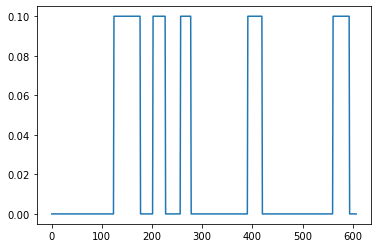

tmd prediction by TMHMM


envelope_glycoprotein
location of fusion peptide: (0, 21)
3981
true vfp AAGLGALFLGFLGDSREHMGA
score of true vfp [0.1]

 predictions close to vfp
Empty DataFrame
Columns: [index, subseq, score]
Index: []
  index                 subseq  score
0     0  AAGLGALFLGFLGDSREHMGA    0.1
1     1  AGLGALFLGFLGDSREHMGAA    0.1
2     2  GLGALFLGFLGDSREHMGAAS    0.1
3     3  LGALFLGFLGDSREHMGAASI    0.1
4     4  GALFLGFLGDSREHMGAASIT    0.1

 max score predicted

 top scores
  index                 subseq  score
0     0  AAGLGALFLGFLGDSREHMGA    0.1
6     6  LFLGFLGDSREHMGAASITLT    0.1
1     1  AGLGALFLGFLGDSREHMGAA    0.1
8     8  LGFLGDSREHMGAASITLTVQ    0.1
7     7  FLGFLGDSREHMGAASITLTV    0.1


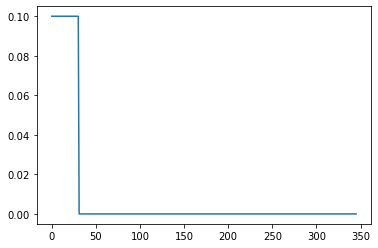

tmd prediction by TMHMM


genome_polyprotein_1
location of fusion peptide: (73, 105)
3981
true vfp MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
score of true vfp [0.1]

 predictions close to vfp
   index                            subseq  score
69    69  HVDMMVGAATLCSALYVGDLCGALFLVGQGFS    0.1
70    70  VDMMVGAATLCSALYVGDLCGALFLVGQGFSW    0.1
71    71  DMMVGAATLCSALYVGDLCGALFLVGQGFSWR    0.1
72    72  MMVGAATLCSALYVGDLCGALFLVGQGFSWRH    0.1
73    73  MVGAATLCSALYVGDLCGALFLVGQGFSWRHR    0.1
   index                            subseq  score
73    73  MVGAATLCSALYVGDLCGALFLVGQGFSWRHR    0.1
74    74  VGAATLCSALYVGDLCGALFLVGQGFSWRHRQ    0.1
75    75  GAATLCSALYVGDLCGALFLVGQGFSWRHRQH    0.1
76    76  AATLCSALYVGDLCGALFLVGQGFSWRHRQHW    0.1
77    77  ATLCSALYVGDLCGALFLVGQGFSWRHRQHWT    0.1

 max score predicted

 top scores
   index                            subseq  score
80    80  CSALYVGDLCGALFLVGQGFSWRHRQHWTVQD    0.1
64    64  ASLRTHVDMMVGAATLCSALYVGDLCGALFLV    0.1
74    74  VGAATLCSALYVGDLCGALFLVGQGFSWRHRQ    0.1
73    73

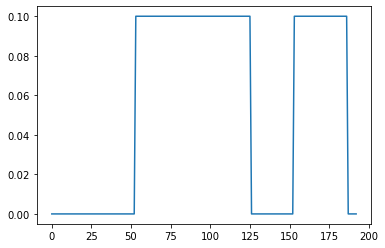

tmd prediction by TMHMM


fusion_glycoprotein_f0
location of fusion peptide: (0, 21)
3981
true vfp FLGLILGLGAAVTAGVALAKT
score of true vfp [0.1]

 predictions close to vfp
Empty DataFrame
Columns: [index, subseq, score]
Index: []
  index                 subseq  score
0     0  FLGLILGLGAAVTAGVALAKT    0.1
1     1  LGLILGLGAAVTAGVALAKTV    0.1
2     2  GLILGLGAAVTAGVALAKTVQ    0.1
3     3  LILGLGAAVTAGVALAKTVQL    0.1
4     4  ILGLGAAVTAGVALAKTVQLE    0.1

 max score predicted

 top scores
    index                 subseq  score
0       0  FLGLILGLGAAVTAGVALAKT    0.1
7       7  LGAAVTAGVALAKTVQLESEI    0.1
1       1  LGLILGLGAAVTAGVALAKTV    0.1
113   113  FMLTDRELTSIVGGMAVSAGQ    0.1
10     10  AVTAGVALAKTVQLESEIALI    0.1


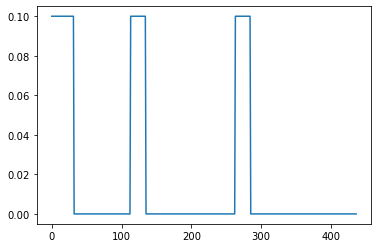

tmd prediction by TMHMM


envelopment_polyprotein
location of fusion peptide: (130, 147)
3981
true vfp WGCGCFNVNPSCLFVHT
score of true vfp [0.1]

 predictions close to vfp
    index             subseq  score
126   126  QCGGWGCGCFNVNPSCL    0.1
127   127  CGGWGCGCFNVNPSCLF    0.1
128   128  GGWGCGCFNVNPSCLFV    0.1
129   129  GWGCGCFNVNPSCLFVH    0.1
130   130  WGCGCFNVNPSCLFVHT    0.1
    index             subseq  score
130   130  WGCGCFNVNPSCLFVHT    0.1
131   131  GCGCFNVNPSCLFVHTY    0.1
132   132  CGCFNVNPSCLFVHTYL    0.1
133   133  GCFNVNPSCLFVHTYLQ    0.0
134   134  CFNVNPSCLFVHTYLQS    0.0

 max score predicted

 top scores
    index             subseq  score
130   130  WGCGCFNVNPSCLFVHT    0.1
332   332  VGAAVSCDAAFLNLTGC    0.1
342   342  FLNLTGCYSCNAGARVC    0.1
338   338  CDAAFLNLTGCYSCNAG    0.1
337   337  SCDAAFLNLTGCYSCNA    0.1


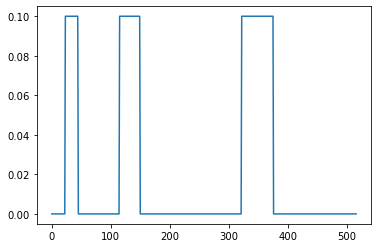

tmd prediction by TMHMM


genome_polyprotein_2
location of fusion peptide: (73, 105)
3981
true vfp IVVSATFCSALYIGDVCGAIMIAAQATIISPQ
score of true vfp [0.1]

 predictions close to vfp
   index                            subseq  score
69    69  HIDLIVVSATFCSALYIGDVCGAIMIAAQATI    0.1
70    70  IDLIVVSATFCSALYIGDVCGAIMIAAQATII    0.1
71    71  DLIVVSATFCSALYIGDVCGAIMIAAQATIIS    0.1
72    72  LIVVSATFCSALYIGDVCGAIMIAAQATIISP    0.1
73    73  IVVSATFCSALYIGDVCGAIMIAAQATIISPQ    0.1
   index                            subseq  score
73    73  IVVSATFCSALYIGDVCGAIMIAAQATIISPQ    0.1
74    74  VVSATFCSALYIGDVCGAIMIAAQATIISPQH    0.1
75    75  VSATFCSALYIGDVCGAIMIAAQATIISPQHH    0.1
76    76  SATFCSALYIGDVCGAIMIAAQATIISPQHHT    0.1
77    77  ATFCSALYIGDVCGAIMIAAQATIISPQHHTF    0.1

 max score predicted

 top scores
   index                            subseq  score
80    80  CSALYIGDVCGAIMIAAQATIISPQHHTFVQD    0.1
63    63  TKGLRTHIDLIVVSATFCSALYIGDVCGAIMI    0.1
72    72  LIVVSATFCSALYIGDVCGAIMIAAQATIISP    0.1
71    71

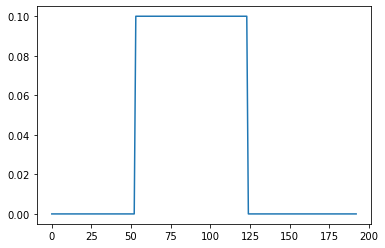

tmd prediction by TMHMM


structural_polyprotein
location of fusion peptide: (83, 101)
3981
true vfp VYPFLWGGAYCFCDSENT
score of true vfp [0.1]

 predictions close to vfp
   index              subseq  score
79    79  VYTGVYPFLWGGAYCFCD    0.1
80    80  YTGVYPFLWGGAYCFCDS    0.1
81    81  TGVYPFLWGGAYCFCDSE    0.1
82    82  GVYPFLWGGAYCFCDSEN    0.1
83    83  VYPFLWGGAYCFCDSENT    0.1
   index              subseq  score
83    83  VYPFLWGGAYCFCDSENT    0.1
84    84  YPFLWGGAYCFCDSENTQ    0.1
85    85  PFLWGGAYCFCDSENTQL    0.1
86    86  FLWGGAYCFCDSENTQLS    0.1
87    87  LWGGAYCFCDSENTQLSE    0.1

 max score predicted

 top scores
   index              subseq  score
93    93  CFCDSENTQLSEAYVERS    0.1
91    91  AYCFCDSENTQLSEAYVE    0.1
90    90  GAYCFCDSENTQLSEAYV    0.1
94    94  FCDSENTQLSEAYVERSE    0.1
95    95  CDSENTQLSEAYVERSEV    0.1


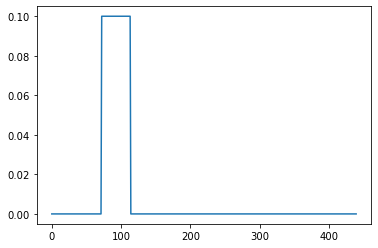

tmd prediction by TMHMM


spike_glycoprotein_s
location of fusion peptide: (204, 225)
3981
true vfp LAATSASLFPPWTAAAGVPFY
score of true vfp [0.]

 predictions close to vfp
    index                 subseq  score
200   200  SGYTLAATSASLFPPWTAAAG    0.0
201   201  GYTLAATSASLFPPWTAAAGV    0.0
202   202  YTLAATSASLFPPWTAAAGVP    0.0
203   203  TLAATSASLFPPWTAAAGVPF    0.0
204   204  LAATSASLFPPWTAAAGVPFY    0.0
    index                 subseq  score
204   204  LAATSASLFPPWTAAAGVPFY    0.0
205   205  AATSASLFPPWTAAAGVPFYL    0.0
206   206  ATSASLFPPWTAAAGVPFYLN    0.0
207   207  TSASLFPPWTAAAGVPFYLNV    0.0
208   208  SASLFPPWTAAAGVPFYLNVQ    0.0

 max score predicted

 top scores
    index                 subseq  score
149   149  DLLFDKVKLSDVGFVEAYNNC    0.1
137   137  ECSKASSRSAIEDLLFDKVKL    0.1
385   385  LYFIHFSYVPTKYVTARVSPG    0.1
388   388  IHFSYVPTKYVTARVSPGLCI    0.1
389   389  HFSYVPTKYVTARVSPGLCIA    0.1


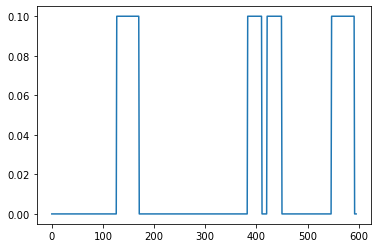

tmd prediction by TMHMM


fusion_glycoprotein_f0_2
location of fusion peptide: (0, 16)
3981
true vfp CCGFTLGVGGAWFQAY
score of true vfp [0.1]

 predictions close to vfp
Empty DataFrame
Columns: [index, subseq, score]
Index: []
  index            subseq  score
0     0  CCGFTLGVGGAWFQAY    0.1
1     1  CGFTLGVGGAWFQAYL    0.1
2     2  GFTLGVGGAWFQAYLN    0.1
3     3  FTLGVGGAWFQAYLNG    0.1
4     4  TLGVGGAWFQAYLNGM    0.0

 max score predicted

 top scores
    index            subseq  score
0       0  CCGFTLGVGGAWFQAY    0.1
2       2  GFTLGVGGAWFQAYLN    0.1
3       3  FTLGVGGAWFQAYLNG    0.1
1       1  CGFTLGVGGAWFQAYL    0.1
106   106  QSNTHCWCPPKPTIVP    0.0


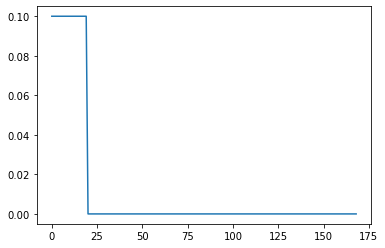

tmd prediction by TMHMM


spike_glycoprotein_2
location of fusion peptide: (216, 237)
3981
true vfp IGGIALGGLTSAVSIPFSLAI
score of true vfp [0.1]

 predictions close to vfp
    index                 subseq  score
212   212  TGSLIGGIALGGLTSAVSIPF    0.1
213   213  GSLIGGIALGGLTSAVSIPFS    0.1
214   214  SLIGGIALGGLTSAVSIPFSL    0.1
215   215  LIGGIALGGLTSAVSIPFSLA    0.1
216   216  IGGIALGGLTSAVSIPFSLAI    0.1
    index                 subseq  score
216   216  IGGIALGGLTSAVSIPFSLAI    0.1
217   217  GGIALGGLTSAVSIPFSLAIQ    0.1
218   218  GIALGGLTSAVSIPFSLAIQA    0.1
219   219  IALGGLTSAVSIPFSLAIQAR    0.0
220   220  ALGGLTSAVSIPFSLAIQARL    0.0

 max score predicted

 top scores
    index                 subseq  score
209   209  AMYTGSLIGGIALGGLTSAVS    0.1
155   155  IEDILFSKLVTSGLGTVDADY    0.1
592   592  VVSMLLLCCCSTGCCGFFSCF    0.1
591   591  FVVSMLLLCCCSTGCCGFFSC    0.1
216   216  IGGIALGGLTSAVSIPFSLAI    0.1


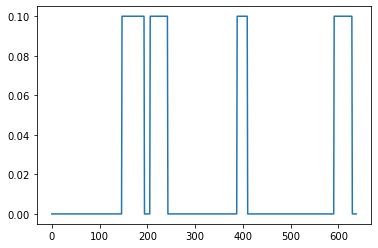

tmd prediction by TMHMM


In [103]:
# IPython.OutputArea.auto_scroll_threshold = 9999;
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 88em; }</style>"))
# 'spyke_glycoprotein_1' --> '617==I==Spyke glycoprotein' 
# 'envelope_glycoprotein' --> '265==I==Envelope glycoprotein gp160 (Env polyprotein)'
# 'genome_polyprotein_1'--> '158==II==Genome polyprotein' 
# 'fusion_glycoprotein_f0'--> '618==I==fusion glycoprotein F0'
# 'envelopment_polyprotein': --> '667==II==Envelopment polyprotein'
# 'genome_polyprotein_2'---> '153==II==Genome polyprotein'
# 'structural_polyprotein' ----> '602==II==Structural polyprotein'
# 'spike_glycoprotein_s' ----> '192==I==Spike glycoprotein S'
# 'fusion_glycoprotein_f1' ---> '316==I==Fusion glycoprotein F0'
        
# Blosum 62 regression RFR 
dataset = 'regression15033' #regression6638    25_100_ratio
encode = 'ohe'   # 'ohe', 'blosum62', 'z-scale', 'nlf', 'phys', 'phys_mut', 'phys_rfr', 'phys_mut_rfr'
# model = 'lr' #'rfr', 'knr', 'linear_svr' 'svr' 'sgdr' 
dl='lstm'
model = 'lstm3' 
names = ['spyke_glycoprotein_1','envelope_glycoprotein','genome_polyprotein_1','fusion_glycoprotein_f0',
         'envelopment_polyprotein','genome_polyprotein_2','structural_polyprotein','spike_glycoprotein_s',
        'fusion_glycoprotein_f0_2','spike_glycoprotein_2']
mode = 'max'
# mode= 'mean'
for name in names:
    print(name)
    get_image(name, dataset,encode, model, dl, mode = mode)
